# Trip analysis of Ford GoBike System

## Investigation Overview

In this investigation, I wanted to look at the factors that could increase the utilization of bike share system in bay area. The main focus was on the time(Month, Weekday, Hour), user type and user gender.

## Dataset Overview

The data consisted of approximately 2.29M shared bike rides from June 2018 through May 2019 in bay area. The attributes included the trip duration, start/end time, start/end location, and user information such as gender, user type and user age . About 160K data points were removed from the analysis due to missing information or outliers of user ages.

In [1]:
# import all packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('clean_data.csv')

## Utilizations of shared bike by each month

The monthly average Utilization of shared bike is about 178K. However, the actual utilization has huge different on month by month. For exemple, the total utilization in March 2019 was almost doubled compared with the total utilization in December 2018.

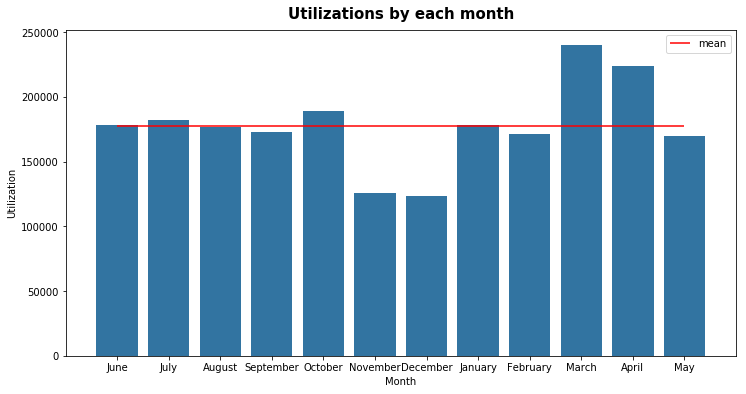

In [4]:
# countplot by month
plt.figure(figsize=(12,6))

base_color = sns.color_palette()[0]
ax = sns.countplot(data = df, x='start_time_month', color = base_color)

plt.title('Utilizations by each month', y=1.015, fontsize=15, fontweight='bold')
plt.ylabel('Utilization')
plt.xlabel('Month')

plt.hlines(y=df.shape[0]/12, xmin=0, xmax=11, color='red', alpha=1)
plt.legend(labels=['mean']);

## Hourly utilizations during a week

Overall, users are more likely to use the shared bikes during weekdays, especially during 7am - 9am and 4pm - 7pm. This is probably because most of users used the shared bikes for commuting. 

One interesting thing is that the bike usage after 6pm on Friday was relatively less than other weekdays. What does it mean? I guess it's because people usually get off from their work early on Friday, and colleges always don't open classes on Friday. Or maybe they were already on vacation!

In [5]:
# heatmap between weekday vs hour
df['start_time_weekday'] = pd.Categorical(df['start_time_weekday'],categories=['Sun','Mon','Tue','Wed','Thu','Fri','Sat'], ordered=True)

ct_counts = df.groupby(['start_time_weekday', 'start_time_hour']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'start_time_hour', columns = 'start_time_weekday', values = 'count')

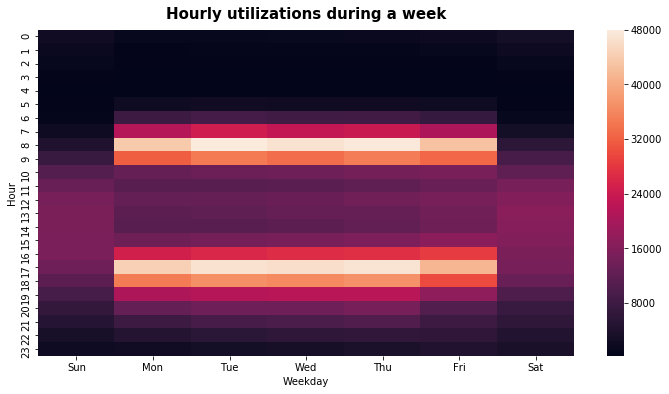

In [6]:
plt.figure(figsize=(12,6))

sns.heatmap(ct_counts)

plt.title('Hourly utilizations during a week', y=1.015, fontsize=15, fontweight='bold')
plt.ylabel('Hour')
plt.xlabel('Weekday');

# Hourly utilization between Customer vs. Subscriber

There are two type of users - customer and subscriber. Subscribers are thoses who had registered in the membership program, which accounted 88% of total users. The remaining 12% users were casual riders who used the system ocasionally.

After dividing the hourly utilization heatmap by customer and subscriber, we can see that the subscriber heatmap still follows the previous chart. It looks like subscribers used bikes for commuting purpose.

However, customers used bikes both during weekdays and weekends. During weekdays, most of rides were initiated during 7am - 9am and 4pm - 7pm, and during weekends, mos of bikes were rent during 10am - 4pm.

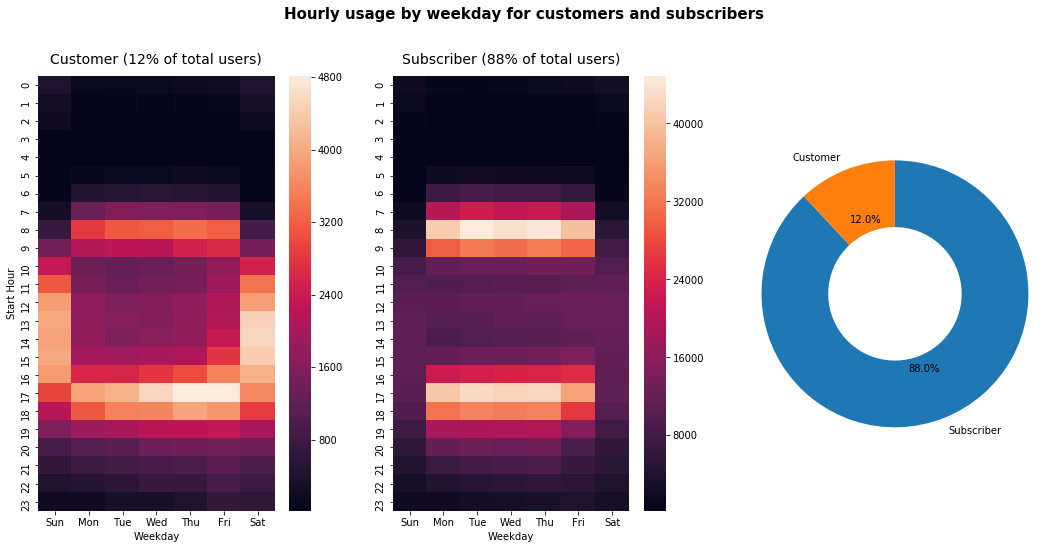

In [7]:
# weekday, hour, user type
df['start_time_weekday'] = pd.Categorical(df['start_time_weekday'],categories=['Sun','Mon','Tue','Wed','Thu','Fri','Sat'], ordered=True)

plt.figure(figsize=(18,8))
plt.suptitle('Hourly usage by weekday for customers and subscribers', fontsize=15, fontweight='bold', y=1)

plt.subplot(1, 3, 1)

a0 = df.groupby(['start_time_weekday', 'start_time_hour','user_type']).size()
a0 = a0.reset_index(name = 'count')
a1=a0[a0['user_type']=='Customer']
a1 = a1.pivot(index = 'start_time_hour', columns = 'start_time_weekday', values = 'count')
sns.heatmap(a1)

plt.title("Customer (12% of total users)", fontsize=14,y=1.015)
plt.xlabel('Weekday')
plt.ylabel('Start Hour')

plt.subplot(1, 3, 2)


a2=a0[a0['user_type']=='Subscriber']
a2 = a2.pivot(index = 'start_time_hour', columns = 'start_time_weekday', values = 'count')
sns.heatmap(a2)

plt.title("Subscriber (88% of total users)", fontsize=14, y=1.015)
plt.xlabel('Weekday')
plt.ylabel('')

# user type distribution
plt.subplot(1, 3, 3)

sorted_counts = df['user_type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,autopct='%1.1f%%',counterclock = False, wedgeprops = {'width' : 0.5});

plt.axis('square');


# Trip duration between Customer vs. Subscriber

The average ride duration of customers were significantly higher than subscribers. Especially during weekends, the average ride duration of customers was around 1000 seconds, which was about twice of the subscribers' ride time.

In [8]:
df2 = df[df['member_gender']!= 'Other']

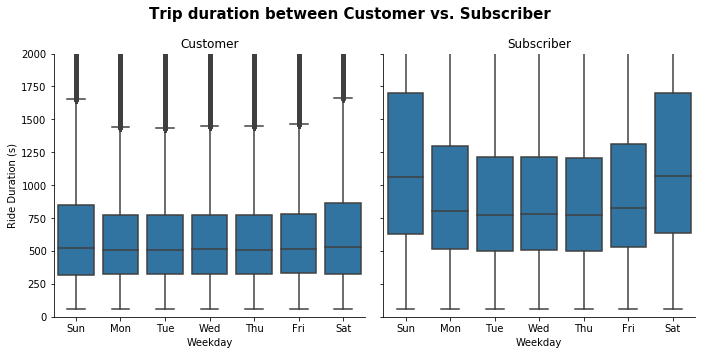

In [9]:
# duration by user type and gender

g=sns.FacetGrid(data=df2,col = 'user_type', margin_titles= True, size = 5)

g.map(sns.boxplot, 'start_time_weekday','duration_sec')
#g.fig.suptitle('Daily duration between Subscribers and Customers', fontsize=15, fontweight='bold', y=1.05)
g.set_axis_labels('Weekday', 'Ride Duration (s)') 
axes = g.axes.flatten()
axes[0].set_title("Customer")
axes[1].set_title("Subscriber")

plt.ylim((0,2000));
plt.suptitle('Trip duration between Customer vs. Subscriber', fontsize=15, fontweight='bold'); # Add this for main title
plt.subplots_adjust(top=0.85);


In [ ]:
#to slides
!jupyter nbconvert Slide.ipynb --to slides --post serve --template output_toggle

[NbConvertApp] Converting notebook Slide.ipynb to slides
[NbConvertApp] Writing 393239 bytes to Slide.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Slide.slides.html
Use Control-C to stop this server
